In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
data = pd.read_csv('../input/movie_metadata.csv')
data.sample(3)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
2955,Color,Franklin J. Schaffner,55.0,125.0,76.0,801.0,Anne Meara,1000.0,NaN,Drama|Thriller,...,123.0,English,UK,R,12000000.0,1978.0,837.0,7.0,1.85,0
2230,Color,Thomas Bezucha,94.0,109.0,15.0,350.0,Luke Bracey,3000.0,23179303.0,Adventure|Comedy|Family|Romance,...,44.0,English,Hungary,PG,20000000.0,2011.0,775.0,5.8,1.85,6000
4102,Color,Todd Solondz,148.0,134.0,377.0,812.0,Jon Lovitz,22000.0,3000000.0,Comedy|Drama,...,499.0,English,USA,NaN,3000000.0,1998.0,11000.0,7.8,1.85,0


In [3]:
data.shape # Número de observações

(5043, 28)

> Atributos numéricos selecionados
> 
* budget
* title_year
* num_critic_for_reviews
* imdb_score
* movie_facebook_likes
* num_voted_users
* gross
* duration

In [4]:
col = ['title_year','duration','budget','num_critic_for_reviews','movie_facebook_likes','num_voted_users','gross','imdb_score']

In [5]:
data = data[col]
data.shape # Número de observações

(5043, 8)

In [6]:
data.sample(3)

,title_year,duration,budget,num_critic_for_reviews,movie_facebook_likes,num_voted_users,gross,imdb_score
251,2015.0,114.0,110000000.0,358.0,52000,147497,155181732.0,6.1
3398,2015.0,90.0,8000000.0,328.0,0,31489,3442820.0,7.3
3679,2003.0,104.0,5000000.0,91.0,1000,18792,1056102.0,6.6


In [7]:
# Dados Faltantes
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()*100/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Porcentagem'])
missing_data.head(20)

,Total,Porcentagem
gross,884,17.529248
budget,492,9.756098
title_year,108,2.141582
num_critic_for_reviews,50,0.991473
duration,15,0.297442
imdb_score,0,0.000000
num_voted_users,0,0.000000
movie_facebook_likes,0,0.000000


In [8]:
# Remover Observacões com algum dado ausente
data = data.dropna()
print(data.isnull().sum().max())
data.shape

0


(3889, 8)

In [9]:
data.sample(5)

,title_year,duration,budget,num_critic_for_reviews,movie_facebook_likes,num_voted_users,gross,imdb_score
2064,2000.0,88.0,23000000.0,53.0,153,3914,13019253.0,5.6
1921,2003.0,105.0,20000000.0,66.0,0,48095,35990505.0,5.8
1080,1994.0,119.0,45000000.0,39.0,1000,45798,92115211.0,6.7
3421,2004.0,102.0,50000000.0,100.0,532,9003,23106.0,6.6
3046,1986.0,100.0,12000000.0,52.0,902,5187,4884663.0,5.5


In [10]:
sum(data['movie_facebook_likes'] == 0)

1774

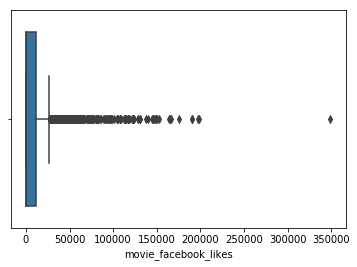

In [11]:
import seaborn as sns
sns.boxplot(x=data['movie_facebook_likes'] )

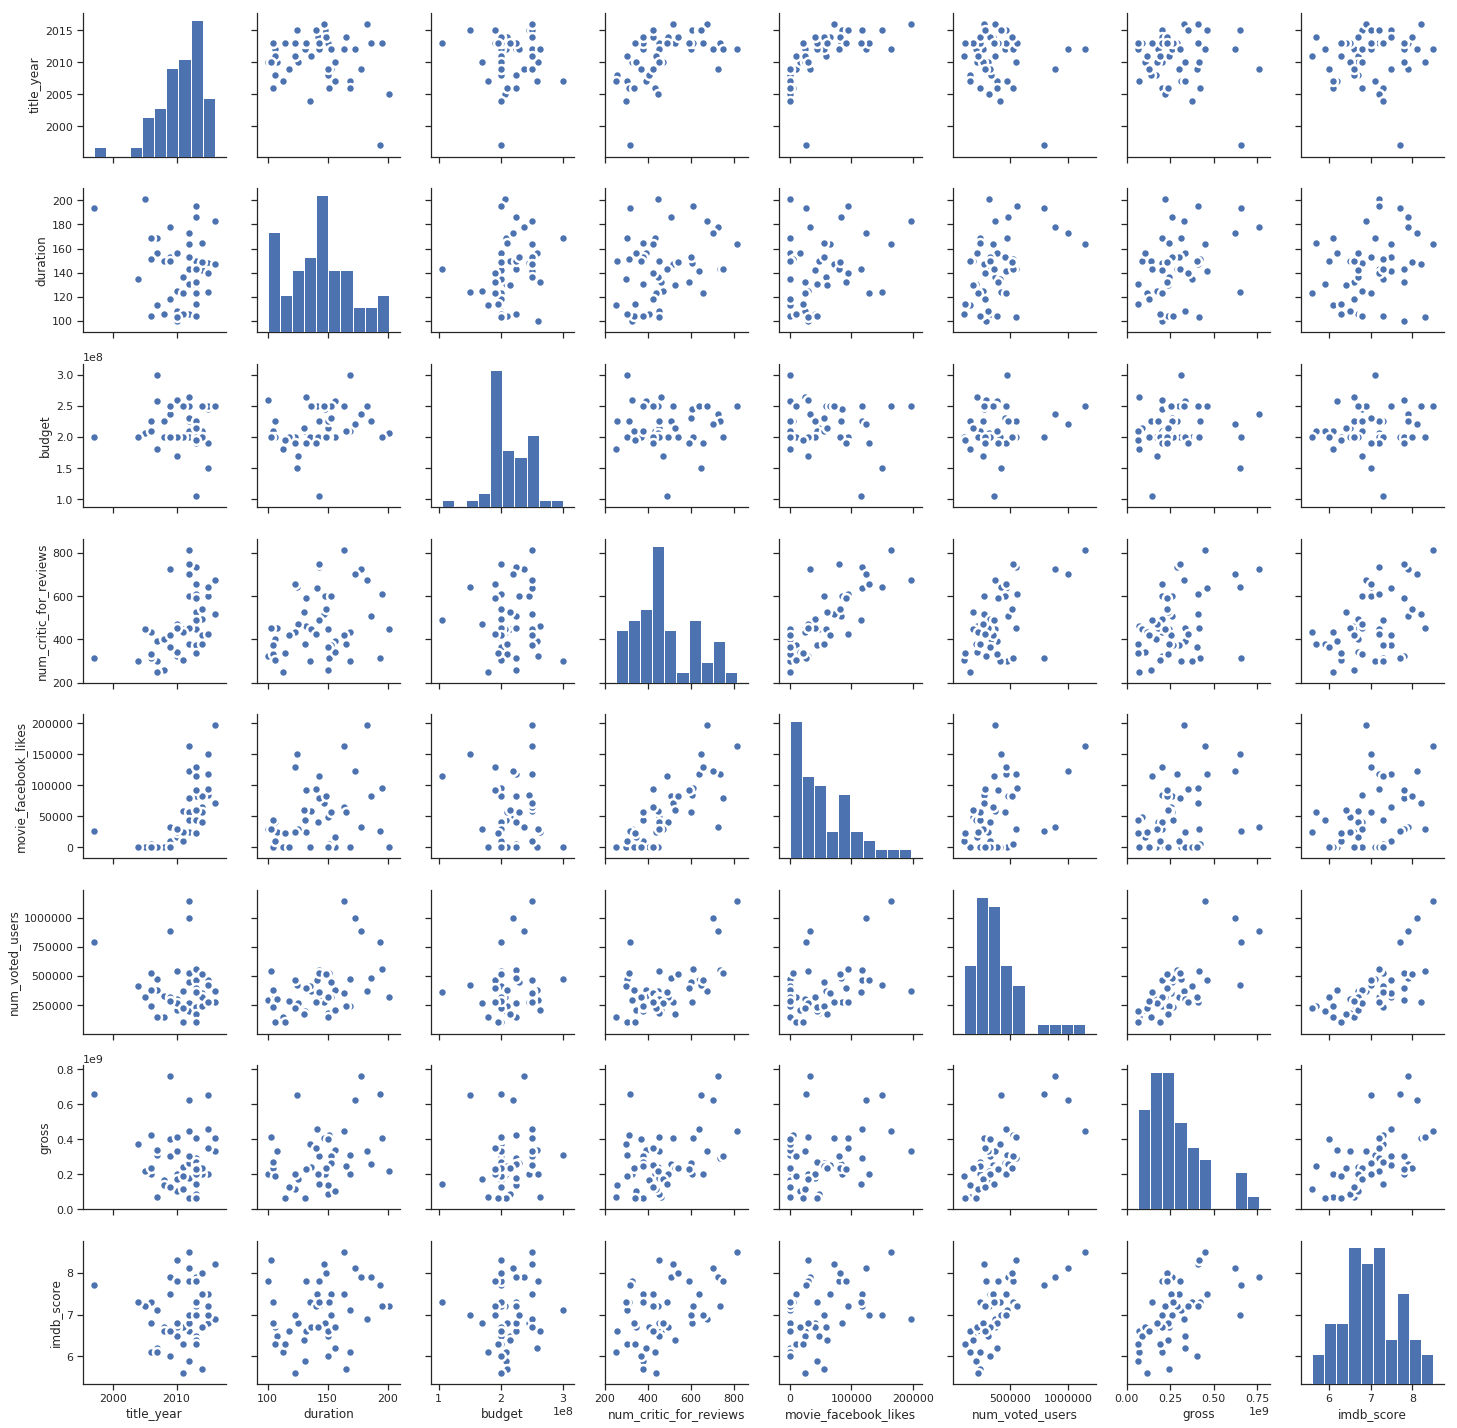

In [12]:
import seaborn as sns
 
sns.set(style="ticks")
sns.pairplot(data[0:50], kind="scatter", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))


**Análise de Componentes Principais**

> Normalizar dados

In [13]:
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig

A = data
M = mean(A.T, axis=1)
# center columns by subtracting column means
C = A - M
# calculate covariance matrix of centered matrix
V = cov(C.T)

In [14]:
# eigendecomposition of covariance matrix
values, vectors = eig(V)
print(values)

[4.95382110e+16 4.81719608e+15 1.37284762e+10 3.26854871e+08
 6.46126174e+03 4.54411265e+02 7.28181209e+01 7.62742924e-01]


In [15]:
pd.DataFrame(data=[values], columns=[1,2,3,4,5,6,7,8], index=['CP'])

,1,2,3,4,5,6,7,8
CP,4.953821e+16,4.817196e+15,1.372848e+10,3.268549e+08,6461.261737,454.411265,72.818121,0.762743


In [16]:
print(vectors.shape)
print(vectors)

(8, 8)
[[ 2.04378003e-09  6.02676568e-09 -1.10443986e-06  1.84543221e-04
  -4.37064609e-02 -9.27228139e-02 -9.94526112e-01  2.02484932e-02]
 [ 7.37594628e-09  8.05375393e-08  4.61687517e-05  5.37882830e-05
  -1.67513942e-03  9.95630557e-01 -9.29344687e-02 -8.95375597e-03]
 [ 9.99369575e-01 -3.55028540e-02 -3.06039966e-06 -1.37459140e-06
   2.78387397e-08 -4.19789656e-09  7.55643614e-10  3.78711505e-11]
 [ 6.29254711e-08  8.34875896e-07  4.13282600e-04  3.04926803e-03
  -9.99037741e-01  2.37593905e-03  4.36453703e-02 -1.88680002e-03]
 [ 5.62934384e-06  1.13923481e-04  6.85939355e-02  9.97639912e-01
   3.07563609e-03 -4.68385898e-05  5.42481791e-05  7.22996703e-08]
 [ 5.13182294e-05  1.36121408e-03  9.97643639e-01 -6.85949726e-02
   2.02425285e-04 -4.39848566e-05 -1.86873607e-05 -2.74627402e-06]
 [ 3.55028166e-02  9.99368641e-01 -1.36679297e-03 -2.03463683e-05
   2.09663488e-07 -1.65954666e-08 -3.73982476e-09  2.72812317e-09]
 [ 1.49247171e-10  3.18008355e-09  3.95135139e-06  2.23828654e

In [17]:
pd.DataFrame(data=vectors, columns=[1,2,3,4,5,6,7,8], index=[1,2,3,4,5,6,7,8])

,1,2,3,4,5,6,7,8
1,2.043780e-09,6.026766e-09,-0.000001,0.000185,-4.370646e-02,-9.272281e-02,-9.945261e-01,2.024849e-02
2,7.375946e-09,8.053754e-08,0.000046,0.000054,-1.675139e-03,9.956306e-01,-9.293447e-02,-8.953756e-03
3,9.993696e-01,-3.550285e-02,-0.000003,-0.000001,2.783874e-08,-4.197897e-09,7.556436e-10,3.787115e-11
4,6.292547e-08,8.348759e-07,0.000413,0.003049,-9.990377e-01,2.375939e-03,4.364537e-02,-1.886800e-03
5,5.629344e-06,1.139235e-04,0.068594,0.997640,3.075636e-03,-4.683859e-05,5.424818e-05,7.229967e-08
6,5.131823e-05,1.361214e-03,0.997644,-0.068595,2.024253e-04,-4.398486e-05,-1.868736e-05,-2.746274e-06
7,3.550282e-02,9.993686e-01,-0.001367,-0.000020,2.096635e-07,-1.659547e-08,-3.739825e-09,2.728123e-09
8,1.492472e-10,3.180084e-09,0.000004,0.000002,-1.015243e-03,1.079928e-02,1.939268e-02,9.997531e-01


In [18]:
values_perc = values*100/sum(values)
pd.DataFrame(data=[values_perc], columns=[1,2,3,4,5,6,7,8], index=['CP %'])

,1,2,3,4,5,6,7,8
CP %,91.137572,8.862402,0.000025,6.013289e-07,1.188706e-11,8.359999e-13,1.339666e-13,1.403251e-15


(8, 3889)


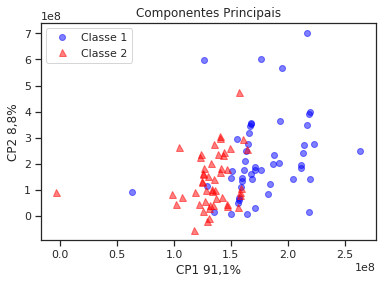

In [19]:
# project data
import matplotlib.pyplot as plt
P = vectors.T.dot(C.T)
print(P.shape)
range = 50
plt.plot(P[0,0:range], P[1,0:range], 'o', markersize=6, color='blue', alpha=0.5, label='Classe 1')
plt.plot(P[0,range:range*2], P[1,range:range*2], '^', markersize=7, color='red', alpha=0.5, label='Classe 2')
plt.xlabel('CP1 91,1%')
plt.ylabel('CP2 8,8%')
plt.legend()
plt.title('Componentes Principais')

plt.show()